# Sentiment Analyisis of Customer Reviews

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline
from matplotlib import pyplot

from numpy import mean
import pandas as pd

## Loading Dataset

In [3]:
# loading data of Software App Customer Reviews

data = pd.read_csv("Software App Reviews.csv")
print(data.shape)
data.head()

(1390, 3)


,id,review,class
0,39,Make it like better with a giant pig bigger th...,feature request
1,42,These screens are small enough without crowdin...,information giving
2,49,Dear Rovio; If you absolutely must continue tr...,information giving
3,56,App crashes when new power up notice pops up.,problem discovery
4,62,It would be nice to have an update that didn ...,information giving


## Data Pre Processing

In [4]:
data["class"].unique()

array(['feature request', 'information giving', 'problem discovery',
       'information seeking'], dtype=object)

In [5]:
print('Length of Dataset: ', data.shape[0])
print('Number of Attributes: ', data.shape[1])

Length of Dataset:  1390
Number of Attributes:  3


In [6]:
data.isnull().sum()

id        0
review    0
class     0
dtype: int64

In [7]:
data.drop('id',axis=1,inplace=True)
data.shape

(1390, 2)

In [8]:
data['class'].value_counts()

information giving     603
problem discovery      494
feature request        192
information seeking    101
Name: class, dtype: int64

c:\Users\Muzammil\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

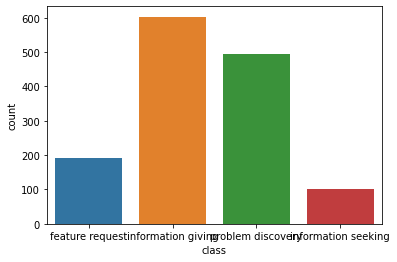

In [9]:
import seaborn as sns
sns.countplot(data['class'])

In [10]:
data.head()

,review,class
0,Make it like better with a giant pig bigger th...,feature request
1,These screens are small enough without crowdin...,information giving
2,Dear Rovio; If you absolutely must continue tr...,information giving
3,App crashes when new power up notice pops up.,problem discovery
4,It would be nice to have an update that didn ...,information giving


#### Apply LabelEncoding to make target feature into numerical

In [11]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['class'] = label.fit_transform(data['class'])

#### Feature Request = 0 , Information Giving = 1 , Problem Discovery = 3 , Information Seeking = 4

In [12]:
data.head()

,review,class
0,Make it like better with a giant pig bigger th...,0
1,These screens are small enough without crowdin...,1
2,Dear Rovio; If you absolutely must continue tr...,1
3,App crashes when new power up notice pops up.,3
4,It would be nice to have an update that didn ...,1


### Data Cleaning

Remove all special and numeric character from data and also remove stopwards and apply Lematizing

In [13]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [14]:
X = data['review']
y = data[['class']]

In [15]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Muzammil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Muzammil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Muzammil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
wordnet=WordNetLemmatizer()
ps = PorterStemmer()

In [17]:
corpus = []
for i in range(len(X)):
    review = re.sub('[^a-zA-Z]', ' ', X[i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
print(corpus[1])

screen small enough without crowding stuff tuck rest add ons never use please get face


In [19]:
corpus

['make like better giant pig bigger king pig',
 'screen small enough without crowding stuff tuck rest add ons never use please get face',
 'dear rovio absolutely must continue trying squeeze dollar customer way least decency include opt like absolutely going spend amount equal paid app first place gimmicky expendable game item',
 'app crash new power notice pop',
 'would nice update crash app',
 'app crash new release',
 'problem version far',
 'please bring back trajectory line least make turn',
 'worth buying crash right beginning',
 'say make shock close button like use bird provide',
 'need change',
 'similarly every single app get updated beautiful io look one update',
 'really fixed',
 'still upload video',
 'anyone else problem app even open',
 'need save photo',
 'never issue user year',
 'app work unless io update device update really fix',
 'see must io better app',
 'please please give u ability rename file app',
 'rate view',
 'still cannot believe team dropbox still',
 'se

### Applying TF-IDF Vectorizer to create reviews embeddings

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

In [21]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Train - Test Split

In [22]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(973, 1806)
(973, 1)
(417, 1806)
(417, 1)


## Applying Machine Learning Algorithms

### Logistic Regression

In [23]:
lr = LogisticRegression(solver='liblinear',random_state=2)
lr.fit(trainX,trainy.values.ravel())
y_pred = lr.predict(testX)

In [24]:
accuracy = lr.score(testX, testy)
print("Accuracy of Decision Tree:",accuracy*100,"%")

Accuracy of Decision Tree: 66.42685851318944 %


### Decision Tree Classifier

In [25]:
DT = DecisionTreeClassifier(max_depth=115)
DT.fit(trainX,trainy)
y_pred = DT.predict(testX)

In [26]:
accuracy = DT.score(testX, testy)
print("Accuracy of Decision Tree:",accuracy*100,"%")

Accuracy of Decision Tree: 67.86570743405275 %


In [27]:
pd.DataFrame(np.c_[testy , y_pred] , columns=["Actual" , "Predicted"])

,Actual,Predicted
0,1,1
1,1,1
2,0,1
3,3,3
4,2,2
...,...,...
412,3,1
413,0,1
414,1,1
415,0,3


### Random Forest Classifier

In [28]:
rf = RandomForestClassifier(max_depth=30,n_estimators=250)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)

In [29]:
accuracy = rf.score(testX, testy)
print("Accuracy of Decision Tree:",accuracy*100,"%")

Accuracy of Decision Tree: 66.66666666666666 %


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')


accuracy = rf.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')



specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

Confusion Matrix:
[[ 15  31   0   8]
 [  5 167   0  16]
 [  0  31   4   1]
 [  1  46   0  92]]
------------------------------------
Accuracy of Random Forest: 66.66666666666666 %
------------------------------------
Specificity: 0.32608695652173914
------------------------------------
Sensitivity: 0.9709302325581395
------------------------------------
Miss Rate (False Positive Rate): 0.6739130434782609
------------------------------------
Miss Rate (False Negative Rate): 0.029069767441860465


In [31]:
#Note:  Classification Report and Roc Curve both codes are combine into one cell
from sklearn.metrics import classification_report
print(classification_report(testy,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.28      0.40        54
           1       0.61      0.89      0.72       188
           2       1.00      0.11      0.20        36
           3       0.79      0.66      0.72       139

    accuracy                           0.67       417
   macro avg       0.78      0.48      0.51       417
weighted avg       0.71      0.67      0.63       417



### Naive Bayes Classifier

In [32]:
NB = MultinomialNB(alpha=4)
NB.fit(trainX,trainy.values.ravel())
y_pred = NB.predict(testX)

In [33]:
accuracy = NB.score(testX, testy)
print("Accuracy of Naive Bayes:",accuracy*100,"%")

Accuracy of Naive Bayes: 60.91127098321343 %


### KNN CLassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(trainX,trainy.values.ravel())
y_pred = knn.predict(testX)

In [35]:
accuracy = knn.score(testX, testy)
print("Accuracy of Naive Bayes:",accuracy*100,"%")

Accuracy of Naive Bayes: 64.02877697841727 %


In [36]:
gb = GradientBoostingClassifier(max_depth=6,n_estimators=450)
gb.fit(trainX,trainy.values.ravel())
y_pred = gb.predict(testX)

In [37]:
accuracy = gb.score(testX, testy)
print("Accuracy of Naive Bayes:",accuracy*100,"%")

Accuracy of Naive Bayes: 64.74820143884892 %


### Support Vector Machine

In [38]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(trainX,trainy.values.ravel())
y_pred = svm.predict(testX)

In [39]:
accuracy = svm.score(testX, testy)
print("Accuracy of SVM:",accuracy*100,"%")

Accuracy of SVM: 64.02877697841727 %


### SGD CLassifier

In [40]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd.fit(trainX,trainy.values.ravel())
y_pred = sgd.predict(testX)

In [41]:
accuracy = sgd.score(testX, testy)
print("Accuracy of SVM:",accuracy*100,"%")

Accuracy of SVM: 66.66666666666666 %


## Testing Model 

In [42]:
import pickle
pickle.dump(cv , open("tfidfvectorizer.pkl" , "wb"))
pickle.dump(DT , open("Customer_Review_Classification.pkl" , "wb")) 

In [43]:
save_cv = pickle.load(open("tfidfvectorizer.pkl",'rb'))
model = pickle.load(open('Customer_Review_Classification.pkl','rb'))

In [44]:
def test_model(sentence):
    sen = save_cv.transform([sentence]).toarray()
    res = model.predict(sen)[0]
    if res == 0:
        return "Feature Request"
    elif res == 1:
        return "Information giving"
    elif res == 2:
        return "Problem Seeking"
    else:
        return "Information Seeking"
    
    

Entering a Random review text to check the result of the model

In [45]:
sen = 'Make it like better with a giant pig bigger '
res = test_model(sen)
print(res)

Information giving


In [46]:
sen = 'Add this feature'
res = test_model(sen)
print(res)

Problem Seeking


## Sentiment Analysis Using VADER Lexicon

Sentiment analysis is a natural language processing technique that aims to determine the sentiment of a piece of text, such as reviews, or news article. It involves analyzing the text and identifying its emotional tone, such as positive, negative, or neutral. Sentiment analysis can be performed using various techniques, including machine learning algorithms and rule-based approaches.

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analysis tool that is specifically designed for social media texts. It uses a lexicon of words and phrases that have been rated for their valence (positive, negative, or neutral) and intensity. Here are some applications of sentiment analysis using VADER:

In [47]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [48]:
data.head()

,review,class
0,Make it like better with a giant pig bigger th...,0
1,These screens are small enough without crowdin...,1
2,Dear Rovio; If you absolutely must continue tr...,1
3,App crashes when new power up notice pops up.,3
4,It would be nice to have an update that didn ...,1


In [49]:
#nltk.download('SentimentIntensityAnalyzer')

[nltk_data] Error loading SentimentIntensityAnalyzer: Package
[nltk_data]     'SentimentIntensityAnalyzer' not found in index


False

In [50]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()
data["sentiments"] = data["review"].apply(lambda x: sid.polarity_scores(x))
data = pd.concat([data.drop(['sentiments'], axis=1), data['sentiments'].apply(pd.Series)], axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Muzammil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [51]:
data.head()

,review,class,neg,neu,pos,compound
0,Make it like better with a giant pig bigger th...,0,0.000,0.625,0.375,0.6597
1,These screens are small enough without crowdin...,1,0.072,0.928,0.000,-0.3080
2,Dear Rovio; If you absolutely must continue tr...,1,0.000,0.919,0.081,0.6249
3,App crashes when new power up notice pops up.,3,0.000,1.000,0.000,0.0000
4,It would be nice to have an update that didn ...,1,0.164,0.667,0.170,0.0258


In [52]:
a = 'This was a pathetic movie.'
sid.polarity_scores(a)

{'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'compound': -0.5719}

Here 'neg' = Negative Sentiments Score, 'neu' = Neutral Sentiments, 'pos' = Postive Sentiments Score, 'compound' = Overall Sentiment score of sentence.

If compound score is greater than 0 then means sentiment is positive if its below 0 then means its negative. 

In [58]:
data.rename(columns = {'Compound': 'Overall Sentiment Score'}, inplace= True)
data

,review,class,neg,neu,pos,overall sentiment score,Sentiment Type
0,Make it like better with a giant pig bigger th...,0,0.000,0.625,0.375,0.6597,Positive
1,These screens are small enough without crowdin...,1,0.072,0.928,0.000,-0.3080,Negative
2,Dear Rovio; If you absolutely must continue tr...,1,0.000,0.919,0.081,0.6249,Positive
3,App crashes when new power up notice pops up.,3,0.000,1.000,0.000,0.0000,Positive
4,It would be nice to have an update that didn ...,1,0.164,0.667,0.170,0.0258,Positive
...,...,...,...,...,...,...,...
1385,Ma fav\tI just love it,1,0.000,0.294,0.706,0.8020,Positive
1386,But the problem is very slow running to update.,3,0.307,0.693,0.000,-0.5499,Negative
1387,But I d suggest two important features which ...,0,0.000,0.833,0.167,0.2960,Positive
1388,Why this is available on iOS while it s not o...,2,0.000,1.000,0.000,0.0000,Positive


In [57]:
data['Sentiment Type'] = data['overall sentiment score'].apply(lambda c: 'Positive' if c >=0 else 'Negative')
sentiment_data = data.loc[:,['review','overall sentiment score','Sentiment Type']]
sentiment_data.head()

,review,overall sentiment score,Sentiment Type
0,Make it like better with a giant pig bigger th...,0.6597,Positive
1,These screens are small enough without crowdin...,-0.3080,Negative
2,Dear Rovio; If you absolutely must continue tr...,0.6249,Positive
3,App crashes when new power up notice pops up.,0.0000,Positive
4,It would be nice to have an update that didn ...,0.0258,Positive


In [60]:
sentiment_data.review[0]

'Make it like better with a giant pig bigger than king pig.'